### Étude de la complexité des algorithmes de tri - BEAUJARD Traïan

## Sommaire

- [I/Introduction](#I/Introduction)
    - [Complexité en temps](#Complexité-en-temps)
    - [Complexité en espace](#Complexité-en-espace)
    - [Cas meilleurs, pires et moyens](#Cas-meilleurs,-pires-et-moyens)
    - [Présentation du projet](#Présentation-du-projet)
- [II/Analyse des algorithmes](#II/Analyse-des-algorithmes)
    - [Bubble Sort](#Bubble-Sort)
    - [Selection Sort](#Selection-Sort)
    - [Insertion Sort](#Insertion-Sort)
    - [Heap Sort](#Heap-Sort)
    - [Quick Sort](#Quick-Sort)
    - [Merge Sort](#section-1-introduction)

- [III/Comparaison des algorithmes](#section-1-introduction)

- [IV/Bonnes pratiques](#section-1-introduction)

# I/Introduction

La **complexité algorithmique** est une mesure de la performance d'un algorithme, exprimée en fonction de la taille de l'entrée.
<br> → Elle permet d'évaluer le **temps** (ou le nombre d'opérations) nécessaire pour exécuter un algorithme donné. 

## Complexité en temps

La **complexité en temps** mesure le nombre d'opérations élémentaires que l'algorithme doit effectuer en fonction de la taille de l'entrée. Elle est généralement exprimée en **notation Big-O** (O), qui décrit le comportement asymptotique de l'algorithme lorsque la taille des données tend vers l'infini.

Voici différentes complexités :

- **O(1)** : Complexité constante — le temps d'exécution ne dépend pas de la taille des données.
- **O(log n)** : Complexité logarithmique — le temps d'exécution croît logarithmiquement avec la taille des données.
- **O(n)** : Complexité linéaire — le temps d'exécution croît linéairement avec la taille des données.
- **O(n log n)** : Complexité linéarithmique — le temps d'exécution croît proportionnellement à la taille des données multipliée par le logarithme de cette taille.
- **O(n²)** : Complexité quadratique — le temps d'exécution croît proportionnellement au carré de la taille des données.
- **O(2^n)** : Complexité exponentielle — le temps d'exécution double à chaque ajout d'élément dans l'entrée.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*Ts35ZjbtSlZ95vMc1gsVTA.jpeg" alt="graph_complexity" width="400" /> [source de l'image](https://sumeetpanchal-21.medium.com/exploring-java-code-samples-understanding-time-complexity-and-outputs-cad12e57ac4b)


## Complexité en espace

La **complexité en espace** fait référence à la quantité de mémoire supplémentaire utilisée par l'algorithme par rapport à la taille de l'entrée. 

## Cas meilleurs, pires et moyens

Chaque algorithme peut avoir trois scénarios de performances en fonction de la structure des données d'entrée :
- **Meilleur cas** : → un temps d'exécution minimal.
- **Pire cas** : → temps d'exécution maximal.
- **Cas moyen** : → la performance moyenne de l'algorithme sur un grand nombre d'exécutions avec des données d'entrée différentes.

## Présentation du projet

La complexité permet de **comparer différents algorithmes** et d'en choisir un qui est le plus adapté à un contexte donné.
Nous allons comparer ces différentes complexités et les performances de 6 algorithmes de tri sur différents types de tableaux.

Voici le diagramme UML du projet :
<img src="https://stein-ind.fr/traian/media/python_project_uml.png" alt="uml_project" />

Le centre du projet est la classe SortBenchmark qui permet de mesurer le temps d'exécution, le nombre d'opérations, et la mémoire utilisée pour les algorithmes spécifiés.

Benchmark 1 / 1
Exécution de Bubble Sort
Exécution de Selection Sort
Exécution de Insertion Sort
Exécution de Heap Sort
Exécution de Quick Sort
Exécution de Merge Sort


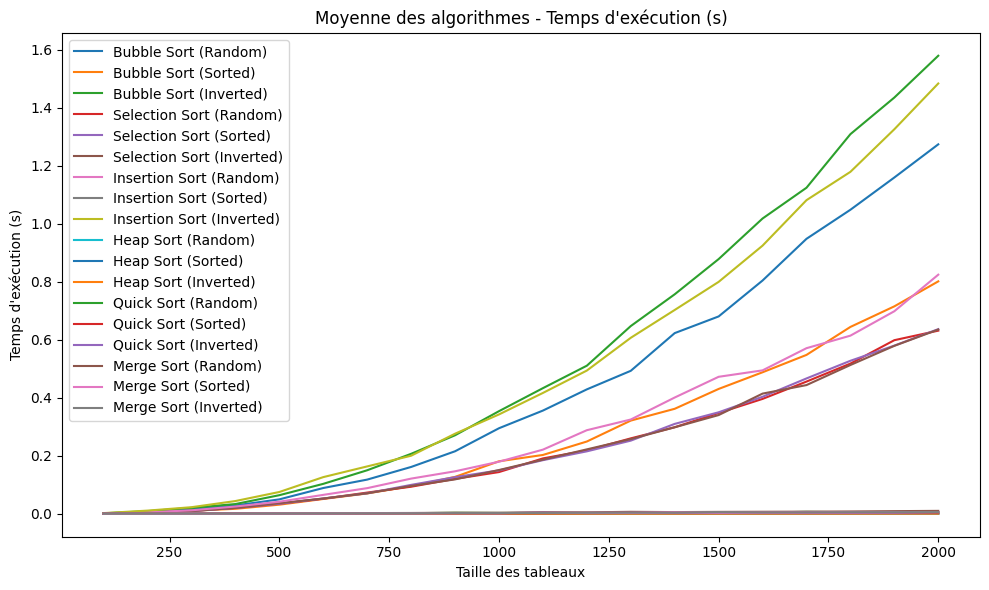

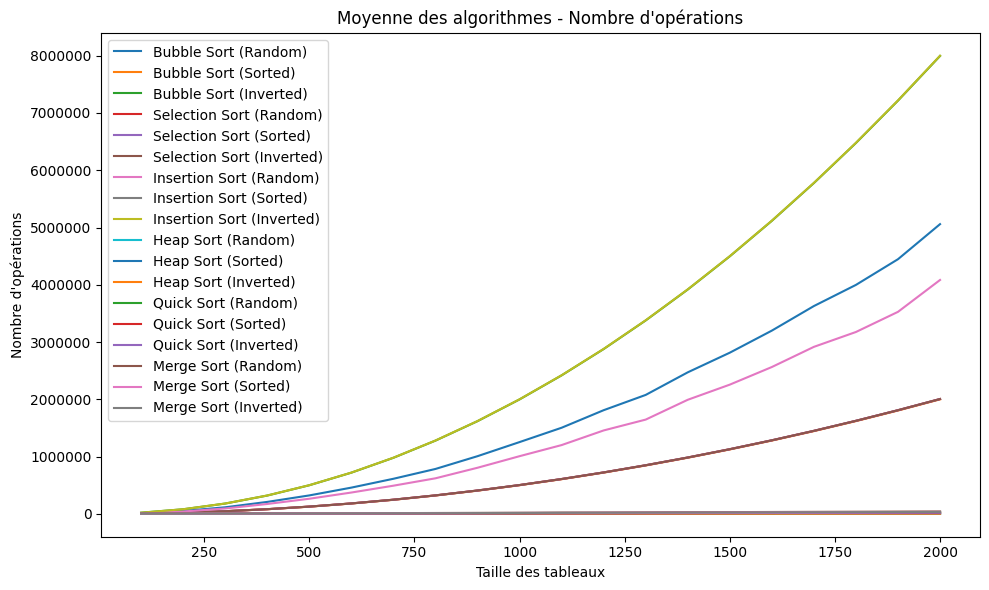

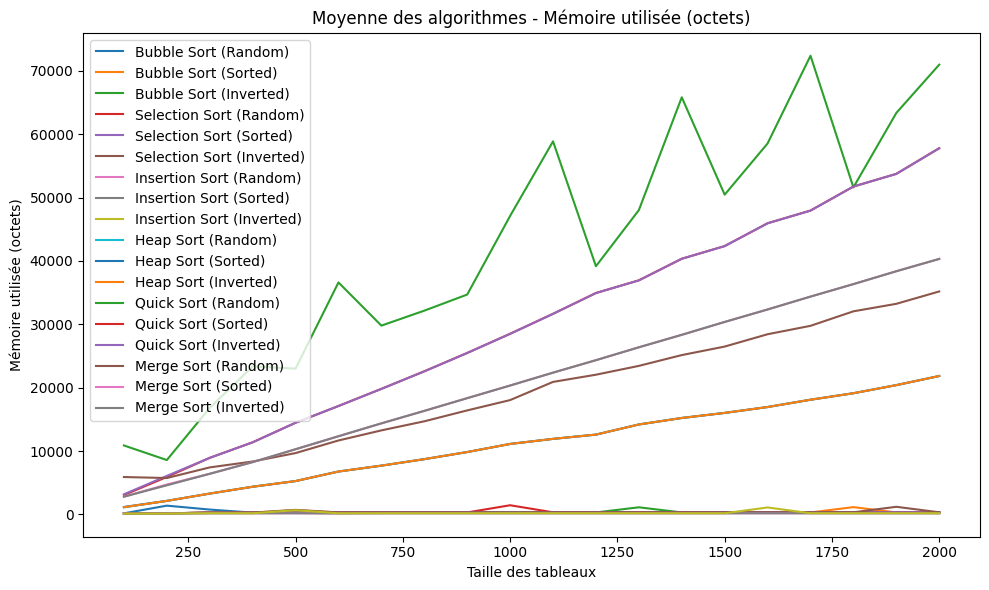

In [5]:
from projet_BEAUJARD_Traian import *

algorithms=[
    BubbleSort(), 
    SelectionSort(), 
    InsertionSort(), 
    HeapSort(), 
    QuickSort(), 
    MergeSort(),
    ]

benchmark = SortBenchmark(
    algorithms,
    nlist=20, 
    nval=100, 
    types_to_sort=['random', 'sorted', 'inverted'], 
    n_runs=1, 
    show_plots=True)

benchmark.run()

dont les paramètres sont :
- `algorithms` : Une liste d'algorithmes parmi : Bubble Sort, Selection Sort, Insertion Sort, Heap Sort, Quick Sort, Merge Sort.
- `nlist` : Nombre de listes à trier (croissant de `nval` par liste).
- `types_to_sort` : Types de listes à trier (par exemple, ordonnées, inversées, aléatoires).
- `n_runs` : Nombre de fois que l'on souhaite exécuter le benchmark pour obtenir des moyennes fiables.
- `show_plots` : Décide si l'on affiche (`True`) ou sauvegarde (`False`) les graphiques générés.

Le code va afficher 3 graphiques avec en courbe chaque algorithme avec chacune des listes :
- Un graphique montrant la **complexité en temps** (Sur l'ordonnée on aura le nombre de secondes écoulées).*
- Un graphique montrant la **complexité en temps** mais avec le nombre d'opérations (Sur l'ordonnée on aura le nombre d'opérationd').
- Un graphique montrant la **complexité en espace** (Sur l'ordonnée on aura la mémoire utilisée). *

► * A noter que l'exécution depuis le notebook peut causer des "sauts" dans les graphiques des valeurs de mémoire utilisée ou sur le temps d'exécution (moins fréquent). Je n'ai pas trouvé comment corriger le problème, la valeur récoltée est perturbée par des process du notebook jupiter. 

De ce fait, j'ai ajouté les graphiques que j'ai généré localement en plus des cellules codes.

# II/Analyse des algorithmes

## Bubble Sort

À chaque itération, on compare des éléments adjacents dans la liste et on échange ceux qui sont dans le mauvais ordre. Ce processus est répété jusqu'à ce que la liste soit entièrement triée.

- Soit un tableau $A$ de taille $n$. Pour chaque itération $i$, on compare chaque paire d'éléments adjacents $A[j]$ et $A[j+1]$ pour $j = 0$ à $n-i-1$, et on les échange si :

$$
A[j] > A[j+1]
$$

- Après chaque itération, le plus grand élément "bulle" vers la fin de la liste et la partie non triée diminue.


Implémentation :
```python
class BubbleSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Bubble Sort')

    def sort(self, data):
        n = len(data)
        operations = 0
        for i in range(n):
            for j in range(0, n-i-1):
                operations += 1  # La comparaison suivante est une opération.
                if data[j] > data[j+1]:
                    data[j], data[j+1] = data[j+1], data[j]
                    operations += 3  # Interversion, 3 opérations avec variable intermédiaire.
        return data, operations
```



|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Bubble Sort     | $O(n)$      | $O(n^2)$    | $O(n^2)$      |

**Meilleur Cas : $O(n)$**

La liste est déjà triée.
- **Nombre de Comparaisons** : $n - 1$
- **Nombre d'Échanges** : 0
-
  $$
  T(n) = O(n)
  $$

**Cas Moyen : $O(n^2)$**

Les éléments sont dans un ordre aléatoire.
- L'algorithme effectue environ $ \frac{n(n - 1)}{2} $ comparaisons et échanges.
- 
  $$
  T(n) = O\left( \frac{n(n - 1)}{2} \right) = O(n^2)
  $$

**Pire Cas : $O(n^2)$**

La liste est triée dans l'ordre inverse.

  - Le nombre maximum de comparaisons et d'échanges est atteint.
-
  $$
  T(n) = O\left( \frac{n(n - 1)}{2} \right) = O(n^2)
  $$

*Exécuter le code ci-dessous pour voir le benchmark de cet algo.*

Benchmark 1 / 1
Exécution de Bubble Sort


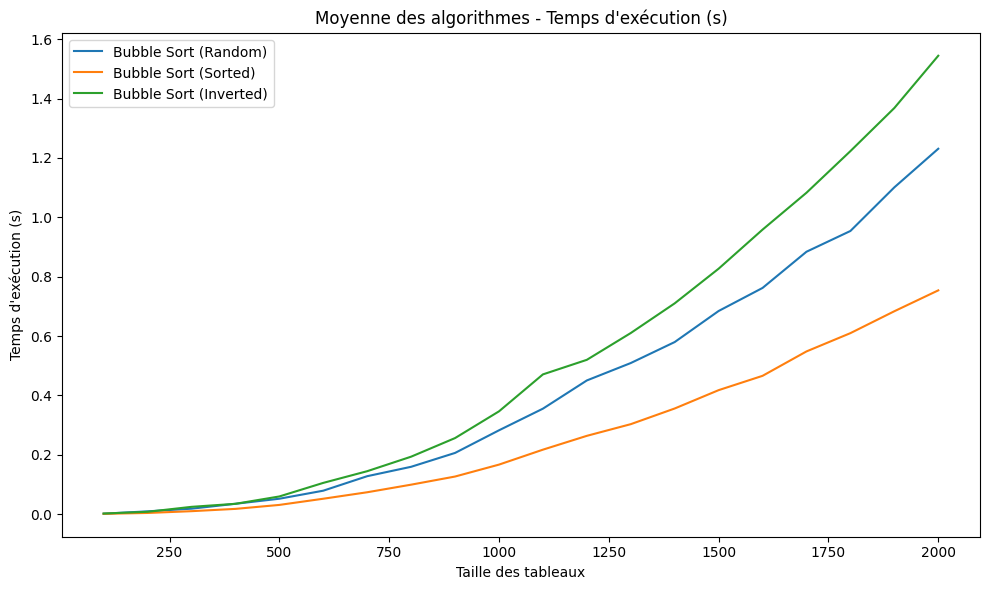

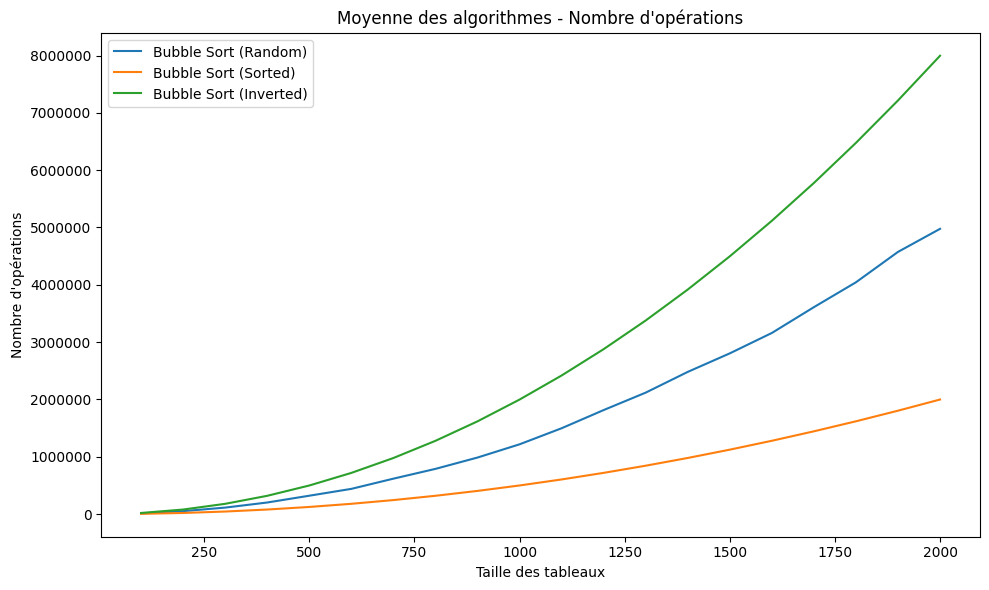

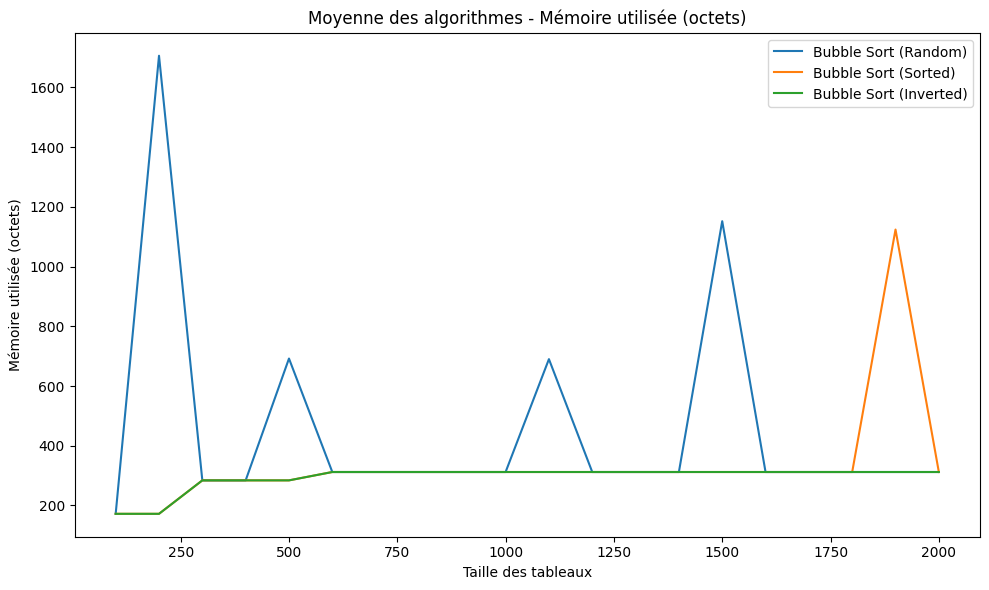

In [5]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[BubbleSort()], nlist=20, nval=100, types_to_sort=['random', 'sorted', 'inverted'], n_runs=1, show_plots=True)
benchmark.run()

Nous remarquons bien, d'après les graphiques que : 
- Temps d'exécution :
    - Tableau trié (meilleur cas) : le temps est minimal, correspondant à une complexité de O(n).
    - Tableau aléatoire (cas moyen) : le temps suit une courbe quadratique, confirmant la complexité O(n²).
    - Tableau inversé (pire cas) : le temps est le plus élevé, conforme à O(n²).
    - Globalement, le temps d'exécution est très long.

- Nombre d'opérations :
    - Même tendance, avec un nombre d'opérations linéaire pour le meilleur cas, et quadratique pour les autres, validant les complexités théoriques.
    - Globalement, le nombre d'opérations effectuées est très grand.

- Mémoire utilisée :
    - Entre 300 et 350 octets total avec le programme. Faible consommation en espace, typique de **l'algorithme in-place**. C'est-à-dire qu'il trie les données directement dans le tableau d'origine sans utiliser d'espace supplémentaire significatif. La complexité en espace est de **O(1)**.

## Selection Sort

Pour chaque itération, on cherche le plus petit élément dans la partie non triée de la liste.
Une fois trouvé, on l'échange avec l'élément situé à la position courante.

- Soit un tableau \(A\) de taille \(n\), pour chaque itération \(i\) de \(0\) à \(n-1\), on trouve l'indice \(j\) tel que :

$$
A[j] = \min(A[i \dots n-1])
$$

- Ensuite, on échange
$$
A[i] \ et \ A[j].
$$

Implémentation :
```python
class SelectionSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Selection Sort')

    def sort(self, data):
        n = len(data)
        operations = 0
        for i in range(n):
            min_idx = i
            for j in range(i+1, n):
                operations += 1 # Comparaison
                if data[j] < data[min_idx]:
                    min_idx = j
            data[i], data[min_idx] = data[min_idx], data[i]
            operations += 3 # Inversion
        return data, operations
```
|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Selection Sort     | $O(n^2)$      | $O(n^2)$    | $O(n^2)$      |

**Meilleur Cas : $O(n^2)$**

Quel que soit l'ordre initial.

  - Le Selection Sort effectue toujours le même nombre de comparaisons, quelle que soit l'ordre initial de la liste.
  - **Nombre de Comparaisons** : $ \frac{n(n - 1)}{2} $
  - **Nombre d'Échanges** : $n - 1$
- 
  $$
  T(n) = O\left( \frac{n(n - 1)}{2} \right) = O(n^2)
  $$

**Cas Moyen et Pire Cas: $O(n^2)$**

Les éléments sont dans un ordre aléatoire ou triés.

  - Comme pour le meilleur cas, le nombre de comparaisons et d'échanges reste le même.
- 
  $$
  T(n) = O(n^2)
  $$


In [ ]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[SelectionSort()], nlist=20, nval=100, types_to_sort=['random', 'sorted', 'inverted'], n_runs=1, show_plots=True)
benchmark.run()


Nous remarquons bien, d'après les graphiques que : 
- Temps d'exécution et Nombre d'opérations:
    - Peu importe la liste, les courbes sont identiques et quadratiques. L'algorithme fera toujours le même nombre d'opérations peu importe les listes.

- Mémoire utilisée :
    - Entre 300 et 320 octets au total avec le programme. Faible consommation en espace, typique de l'algorithme in-place. La complexité en espace est de **O(1)**.

## Insertion Sort

L'algorithme **Insertion Sort** fonctionne en construisant progressivement une sous-liste triée en prenant chaque élément de la liste et en l'insérant à sa position correcte dans cette sous-liste.

- Soit un tableau $A$ de taille $n$. Pour chaque itération $i$ (de $1$ à $n-1$), on sélectionne l'élément $A[i]$ et on le compare aux éléments de la sous-liste $A[0 \dots i-1]$.
- On insère $A[i]$ dans sa position correcte dans la sous-liste triée en décalant les éléments plus grands que $A[i]$ vers la droite.

Implémentation :
```python
class InsertionSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Insertion Sort')

    def sort(self, data):
        operations = 0
        for i in range(1, len(data)):
            key = data[i]
            j = i - 1
            operations += 1  # Initialisation de 'j'
            while j >= 0 and key < data[j]:
                operations += 2  # 2 Comparaisons
                data[j + 1] = data[j]
                operations += 1  # Déplacement de data
                j -= 1
                operations += 1  # Décrémentation de 'j'
            data[j + 1] = key
            operations += 1  # Insertion de 'key'
        return data, operations
```

### Complexité :

|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Insertion Sort  | $O(n)$            | $O(n^2)$          | $O(n^2)$          |

**Meilleur Cas : $O(n)$**

La liste est déjà triée.

- Dans ce cas, chaque élément est comparé une seule fois avec l'élément précédent.
- **Nombre de Comparaisons** : $n - 1$
- **Nombre d'Échanges** : 0 (aucun décalage nécessaire).

  $$
  T(n) = O(n)
  $$

**Cas Moyen : $O(n^2)$**

Les éléments sont dans un ordre aléatoire.

- En moyenne, chaque élément est comparé à environ la moitié de la sous-liste triée.
- Le nombre de décalages est également proportionnel à la taille de la sous-liste.

  $$
  T(n) = O\left( \frac{n(n-1)}{4} \right) = O(n^2)
  $$

**Pire Cas : $O(n^2)$**

La liste est triée dans l'ordre inverse.

- Chaque élément est comparé à tous les éléments de la sous-liste triée.
- Le nombre maximum de décalages est atteint pour chaque insertion.

  $$
  T(n) = O\left( \frac{n(n-1)}{2} \right) = O(n^2)
  $$


In [ ]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[InsertionSort()], nlist=20, nval=100, types_to_sort=['random', 'inverted', 'sorted'], n_runs=1, show_plots=True)
benchmark.run()

Nous remarquons bien, d'après les graphiques que : 
- Temps d'exécution :
    - Tableau trié (meilleur cas) : l'algo est extrêmement rapide; il ne fait aucun décalage, que des comparaisons. Lorsqu'on benchmark l'algo seulement sur la liste 'sorted', nous remarquons que le temps est simplement linéaire donc conforme à O(n).
    - Tableau aléatoire (cas moyen) : le temps suit une courbe quadratique plus faible que dans le pire des cas, mais confirmant la complexité O(n²).
    - Tableau inversé (pire cas) : le temps est le plus élevé mais en courbe quadratique, conforme à O(n²).
    - Globalement, le temps d'exécution est très long.

- Nombre d'opérations :
    - Même tendance, avec un nombre d'opérations linéaire pour le meilleur cas, et quadratique pour les autres, validant les complexités théoriques.
    - Dans le meilleur des cas, il n'y a que peu d'opérations; $taille*2$ (initialisation de 'key' et la comparaison 'key < data[j]'. Mais lorsqu'il faut trier, le nombre d'opérations reste très élevé.

<img src="https://stein-ind.fr/traian/media/moyenne_comparaison_complexity.png" alt="graph_operation_insert_sort" width="500"/>

- Mémoire utilisée :
    - 160 octets au total avec le programme. Très faible consommation en espace, typique de **l'algorithme in-place**. La complexité en espace est **O(1)**.

## Heap Sort

**Heap Sort** utilise un tas binaire (heap) pour trier une liste. D'abord, il transforme la liste en un tas max, puis il extrait successivement le plus grand élément pour le placer à la fin de la liste.


1. **Construction du tas** : Transformer le tableau en un tas max, où chaque parent est plus grand que ses enfants.
2. **Tri** : Échanger l'élément le plus grand avec le dernier élément de la liste non triée, puis ajuster le tas pour maintenir la propriété de max-heap.

- Soit un tableau $A$ de taille $n$. La première étape consiste à construire un tas max en partant de l'indice $\left\lfloor \frac{n}{2} \right\rfloor$ jusqu'à la racine (indice 0). Chaque opération de "heapify" prend $O(\log n)$, mais la construction complète du tas s'effectue en $O(n)$.

- Ensuite, on échange $A[0]$ (la racine; le plus grand élément) avec $A[n-1]$, puis on réorganise le tas de taille $n-1$. Cela prend $O(\log n)$, et on répète cette opération $n$ fois, ce qui donne une complexité de tri de $O(n \log n)$.

Implémentation :

```python
class HeapSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Heap Sort')

    def heapify(self, data, n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2 
        operations = 0
        
        if left < n and data[left] > data[largest]:
            largest = left
            operations += 1  # comparaison

        if right < n and data[right] > data[largest]:
            largest = right
            operations += 1 # comparaison 

        if largest != i:
            data[i], data[largest] = data[largest], data[i]
            operations += 3   # 3 opérations pour l'échange

            ops_from_recursive_call = self.heapify(data, n, largest)
            operations += ops_from_recursive_call

        return operations

    def sort(self, data):
        n = len(data)
        operations = 0

        for i in range(n // 2 - 1, -1, -1):
            operations += self.heapify(data, n, i)

        for i in range(n - 1, 0, -1):
            data[i], data[0] = data[0], data[i]
            operations += 3  # 3 opérations pour l'échange
            operations += self.heapify(data, i, 0)

        return data, operations
```

### Complexité :

|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Heap Sort       | $O(n \log n)$     | $O(n \log n)$     | $O(n \log n)$     |

**Meilleur Cas : $O(n \log n)$**

Le tas est déjà partiellement ordonné.

- La construction du tas prend $O(n)$ et chaque extraction du sommet nécessite $O(\log n)$ pour rétablir la propriété du tas.

  $$
  T(n) = O(n \log n)
  $$

**Cas Moyen : $O(n \log n)$**

Les éléments sont dans un ordre aléatoire.

- La construction du tas prend $O(n)$, puis $n$ opérations de réorganisation du tas sont nécessaires, chacune en $O(\log n)$.

  $$
  T(n) = O(n \log n)
  $$

**Pire Cas : $O(n \log n)$**

Le tas est dans un état totalement désorganisé, nécessitant un maximum d'opérations de réorganisation après chaque extraction.

  $$
  T(n) = O(n \log n)
  $$


In [ ]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[HeapSort()], nlist=20, nval=100, types_to_sort=['random', 'inverted', 'sorted'], n_runs=1, show_plots=True)
benchmark.run()

Nous remarquons bien, d'après les graphiques que : 

- Temps d'exécution :
    - Pour les 3 cas, les temps d'exécution sont proches et conforment à la complexité théorique $O(n \log n)$. L'algorithme Heap Sort est rapide dans tous les scénarios. Globalement, on constate une bonne performance, avec une courbe de complexité plus avantageuse que d'autres algorithmes quadratiques. Cependant, il ne sera pas plus efficace selon la tableau de départ.

- Nombre d'opérations :
    - On observe que, de manière surprenante, le tableau trié demande un peu plus d'opérations que le tableau aléatoire et inversé. Même dans un tableau déjà ordonné, Heap Sort reconstruit un tas et procède aux échanges, même s'ils sont inutiles en termes de tri.
    - Le tableau inversé effectue légèrement moins d'opérations, car il permet des optimisations durant la réorganisation du tas.
    - Le tableau aléatoire se situe entre les deux, avec un comportement qui confirme les attentes d'une complexité moyenne en $O(n \log n)$.
      
- Mémoire utilisée :
    - La consommation en mémoire reste extrêmement faible, montant jusqu'à 750 octets au total pour l'exécution du programme ; complexité spatiale de $O(1)$. L'algorithme n'a besoin que d'un espace constant supplémentaire pour effectuer les échanges lors de la réorganisation du tas.

## Quick Sort

L'algorithme fonctionne en sélectionnant un pivot, puis en réarrangeant les éléments de manière à ce que ceux inférieurs au pivot soient à gauche et ceux supérieurs soient à droite. Ensuite, il applique récursivement ce processus sur les sous-listes. Cela peut parfois entraîner des déséquilibres, selon le choix du pivot.

Soit un tableau $A$ de taille $n$. Quick Sort repose sur le principe de **diviser pour régner** : il choisit un pivot, partitionne le tableau autour de ce pivot, puis trie récursivement les sous-listes gauche et droite. À chaque étape de partition, le coût est de $O(n)$ car il faut comparer chaque élément au pivot. La complexité globale dépend donc du nombre de niveaux de récursion, qui est lié à la taille des sous-listes après chaque partition.

**Étape de partition** :
   - Le coût de la partition est $O(n)$ car il faut comparer chaque élément du tableau au pivot. 
   - Soit $T(n)$ le temps pour trier un tableau de taille $n$. Si la partition divise le tableau en deux sous-listes de tailles égales, la relation de récurrence est :
     \[
     T(n) = 2T\left(\frac{n}{2}\right) + O(n)
     \]
   - Cette équation de récurrence résout à $O(n \log n)$ dans le cas d'une partition équilibrée, ce qui correspond au **meilleur cas** et au **cas moyen**.

**Profondeur de récursion** :
   - Si la partition est équilibrée (chaque sous-liste est de taille à peu près égale), la profondeur de récursion est $O(\log n)$.
   - Si la partition est déséquilibrée (par exemple, si le tableau est déjà trié et que le pivot est mal choisi), la profondeur de récursion peut aller jusqu'à $O(n)$, ce qui correspond au **pire cas**.

Intégration :
```python
from sys import setrecursionlimit

class QuickSort(SortAlgorithm):
    def __init__(self):
        super().__init__('Quick Sort')

    def swap(self, arr, i, j):
        arr[i], arr[j] = arr[j], arr[i]

    def partition(self, arr, low, high):
        operations = 0

        mid = (low + high) // 2
        pivot = arr[mid] # Pivot au milieu du tableau
        self.swap(arr, mid, high)
        operations += 3  # échange du pivot avec la fin
        
        i = low - 1
        
        for j in range(low, high):
            operations += 1  # Comparaison
            if arr[j] < pivot:
                i += 1
                self.swap(arr, i, j)
                operations += 3  # Échange = 3 opérations
        
        self.swap(arr, i + 1, high)
        operations += 3  # Échange du pivot
        
        return i + 1, operations

    def quicksort(self, arr, low, high):
        operations = 0
        if low < high:
            pi, partition_operations = self.partition(arr, low, high)
            operations += partition_operations

            operations += self.quicksort(arr, low, pi - 1)
            operations += self.quicksort(arr, pi + 1, high)

        return operations

    def sort(self, data):
        setrecursionlimit(50000) # permet d'augmenter le nb de récursions
        operations = self.quicksort(data, 0, len(data) - 1)
        return data, operations
```

### Complexité :

|                 | Meilleur Cas      | Cas Moyen         | Pire Cas          |
|-----------------|-------------------|-------------------|-------------------|
| Quick Sort      | $O(n \log n)$     | $O(n \log n)$     | $O(n^2)$          |

**Meilleur Cas : $O(n \log n)$**

- Si le pivot est bien choisi (pivot central), chaque partition divise le tableau en deux sous-listes d'environ taille égale. Le nombre d'étapes de récursion est alors $O(\log n)$, et chaque étape coûte $O(n)$ en temps de partition.
$$
T(n) = 2T\left(\frac{n}{2}\right) + O(n) = O(n \log n)
$$

**Cas Moyen : $O(n \log n)$**

- En moyenne, même si les partitions ne sont pas toujours parfaitement équilibrées, elles sont suffisamment proches pour que la complexité reste en $O(n \log n)$.
$$
T(n) = O(n \log n)
$$

**Pire Cas : $O(n^2)$**

- Si le pivot est mal choisi (comme prendre le premier ou le dernier élément comme pivot dans une liste déjà triée ou inversée), chaque partition ne réduit la taille du tableau que d'un seul élément. La profondeur de récursion devient $O(n)$ et le nombre total de comparaisons augmente.
$$
T(n) = (n-1) + (n-2) + \dots + 1 = \frac{n(n-1)}{2} = O(n^2)
$$
*J'ai eu l'occasion de voir mon programme planter pour des trop grands tableaux en choisissant un mauvais pivot.*

In [ ]:
from projet_BEAUJARD_Traian import *

benchmark = SortBenchmark(algorithms=[QuickSort()], nlist=20, nval=100, types_to_sort=['random', 'inverted', 'sorted'], n_runs=1, show_plots=True)
benchmark.run()

Nous remarquons bien, d'après les graphiques que : 

- Temps d'exécution :
    - Listes triées et inversées :
Les temps d'exécution pour les listes triées et inversées sont très proches, confirmant bien la complexité théorique $O(n \log n)$ dans ces cas. Les deux courbes sont relativement stables avec une croissance progressive.
Le cas inversé semble parfois légèrement plus rapide que le cas trié, ce qui pourrait être dû à la manière dont le pivot gère les inversions.
    - Listes aléatoires :
Pour les listes aléatoires, le temps d'exécution est non seulement plus élevé, mais il présente aussi des variations irrégulières (on observe des pics). Ces fluctuations peuvent être attribuées à des partitions moins équilibrées, qui rendent le processus de tri plus coûteux en certains points.

Malgré cela, Quick Sort reste performant, et globalement plus rapide que les précédents algorithmes.

- Nombre d'opérations :
    - Listes triées et inversées :
Les courbes des listes triées et inversées sont assez similaires et présentent un nombre d'opérations stable, augmentant linéairement avec la taille des tableaux, conformément à la complexité $O(n \log n)$. 

    - Listes aléatoires :
Comme pour le temps d'exécution, le nombre d'opérations pour les listes aléatoires est significativement plus élevé et fluctuant. 
Cela reste conforme à la complexité théorique $O(n \log n)$ en moyenne, mais il y a des moments où certaines partitions sont déséquilibrées (pics).

- Mémoire utilisée :
    - Listes triées et inversées :
La consommation mémoire est relativement stable après une augmentation initiale. Elle oscille autour de 1000 à 1500 octets pour les tableaux de grande taille. Cela correspond bien à la complexité en espace de $O(\log n)$, qui dépend de la profondeur maximale de récursion dans Quick Sort.
La courbe pour les listes triées est légèrement plus basse que celle des listes inversées, ce qui pourrait indiquer un meilleur équilibrage des partitions dans le cas trié.

    - Listes aléatoires :
Pour les listes aléatoires, on observe des fluctuations beaucoup plus importantes dans la consommation mémoire, atteignant parfois plus de 2000 octets. Cela s'explique par des partitions parfois déséquilibrées, nécessitant un plus grand nombre de niveaux de récursion, ce qui augmente la profondeur de la pile d'appels.
 

En conclusion, cet algorithme est efficace mais peut se montrer instable sur les listes aléatoires.